In [ ]:
# Welcome to MLT. This is the first session of the term which will introduce you the basics of numpy.
from keras.datasets import mnist
import numpy as np

In [ ]:
train,test= mnist.load_data()
X_train,y_train=train

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
d1=X_train[y_train==0][:2000] # first 2000 datapoints where image is 0
d2=X_train[y_train==1][:2000] # first 2000 datapoints where image is 1
y1=y_train[y_train==0][:2000]
y2=y_train[y_train==1][:2000]

In [ ]:
d1.shape

(2000, 28, 28)

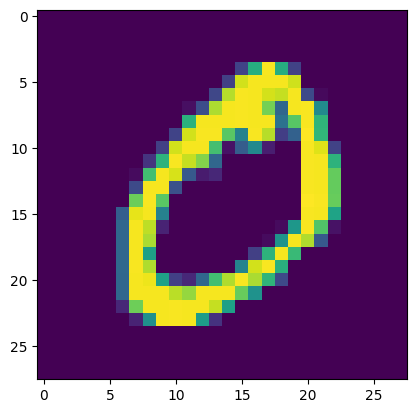

In [ ]:
import matplotlib.pyplot  as plt

plt.imshow(d1[0])

In [ ]:
d1=d1.reshape(2000,-1)
d2=d2.reshape(2000,-1)

print(d1.shape)

(2000, 784)


In [ ]:
X=np.row_stack((d1,d2)).T
X.shape

(784, 4000)

In [ ]:
y=np.concatenate((y1,y2))
y.shape

(4000,)

In [ ]:
def PCA(X):
  d,n=X.shape
  X=X-np.mean(X,axis=1).reshape(d,1)
  C=X@X.T/n
  eigenvalues,eigenvectors=np.linalg.eigh(C)

  eigval=eigenvalues[::-1]
  eigvec=eigenvectors[:,::-1]

  return eigval,eigvec


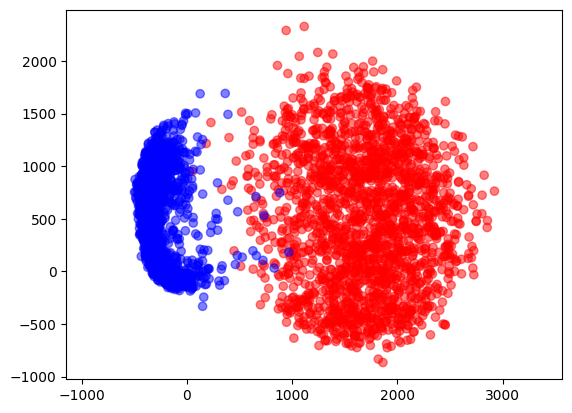

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] (784, 2)
(784, 784)


In [ ]:
eigval,eigvec=PCA(X)

W=eigvec[:,:2]
new_X=W.T@X


plt.axis('equal')
colors=np.array(['red','blue'])
plt.scatter(new_X[0],new_X[1],c=colors[y],alpha=0.5)
plt.show()
print(W,W.shape)
print(eigvec.shape)